# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *9장 합성곱 신경망*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 9장 미니 프로젝트 B3  얼굴 찾기 : 전이학습 활용하기


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread             # 이미지를 읽어 들인다
from skimage.transform import resize      # 이미지의 크기를 변경할 수 있다

In [ ]:
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras import models, layers
from keras.models import Model

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

<Figure size 432x288 with 0 Axes>

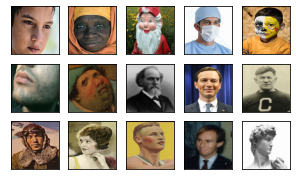

In [ ]:
face_images = []
for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    face_images.append(img)

def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

plot_images(3,5, face_images)

<Figure size 432x288 with 0 Axes>

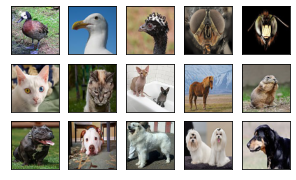

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/animals/'

animal_images = []
for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    animal_images.append(img)

plot_images(3,5, animal_images)

In [ ]:
X = face_images + animal_images
# 얼굴 이미지는 1, 얼굴이 아닌 이미지는 0 - sparse_categorical_entropy 
y = [[1]]* len(face_images) + [[0]] * len(animal_images)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(30, 75, 75, 3) (30, 1)


In [ ]:
pre_trained_model = InceptionV3(input_shape=(75, 75, 3),
                                include_top=False,
                                weights=None)

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_850 (Conv2D)             (None, 37, 37, 32)   864         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_846 (BatchN (None, 37, 37, 32)   96          conv2d_850[0][0]                 
__________________________________________________________________________________________________
activation_846 (Activation)     (None, 37, 37, 32)   0           batch_normalization_846[0][0]    
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

In [ ]:
model = Model(pre_trained_model.input, my_layer)

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_850 (Conv2D)             (None, 37, 37, 32)   864         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_846 (BatchN (None, 37, 37, 32)   96          conv2d_850[0][0]                 
__________________________________________________________________________________________________
activation_846 (Activation)     (None, 37, 37, 32)   0           batch_normalization_846[0][0]    
___________________________________________________________________________________________

In [ ]:
history = model.fit(X, y, epochs=100, shuffle=True)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.3122 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 63ms/step - loss: 0.4966 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 64ms/step - loss: 0.4983 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 50ms/step - loss: 0.4960 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 55ms/step - loss: 0.4488 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2716 - accuracy: 0.5667
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 0.1026 - accuracy: 0.9333
Epoch 8/100
1/1 [==============================] - 0s 45ms/step - loss: 0.0406 - accuracy: 0.9667
Epoch 9/100
1/1 [==============================] - 0s 50ms/step - loss: 0.0318 - accuracy: 0.9667
Epoch 10/100
1/1 [==============================] - 0s 49ms/step - loss: 5.2734e-04 - accuracy: 1.0000
Epoch 11/100
1/1 

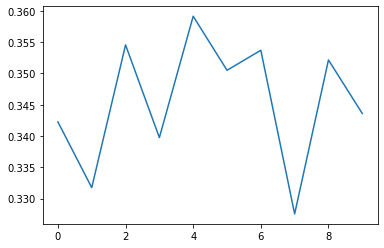

<Figure size 432x288 with 0 Axes>

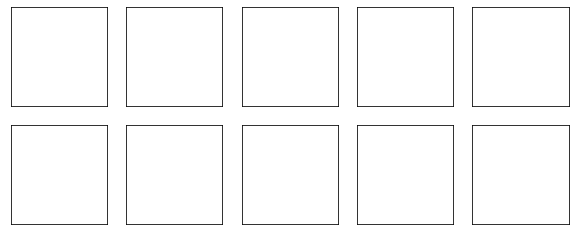

In [ ]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'

test_images = []
for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (75,75))
    test_images.append(img)

test_images = np.array(test_images)
test_result = model.predict(test_images)
plt.plot(test_result)

fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:            
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

In [ ]:
frozen = InceptionV3(input_shape=(75, 75, 3),
                     include_top=False,
                     weights='imagenet')
last_layer = frozen.get_layer('mixed7')
last_output = last_layer.output

for layer in frozen.layers:
    layer.trainable = False

In [ ]:
my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(256, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

transfer_learner = Model(frozen.input, my_layer)
transfer_learner.summary()
transfer_learner.compile(optimizer='adam',
            loss='mse',
            metrics=['accuracy'])

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_944 (Conv2D)             (None, 37, 37, 32)   864         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_940 (BatchN (None, 37, 37, 32)   96          conv2d_944[0][0]                 
__________________________________________________________________________________________________
activation_940 (Activation)     (None, 37, 37, 32)   0           batch_normalization_940[0][0]    
___________________________________________________________________________________________

In [ ]:
history = transfer_learner.fit(X, y, epochs=100, shuffle=True)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.2666 - accuracy: 0.5667
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0517 - accuracy: 0.9333
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 1.9464e-04 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 1.4599e-04 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 4.1950e-04 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 4.4999e-04 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 2.0034e-04 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 7.6538e-05 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 3.2449e-05 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 1.4442e-05 - accura

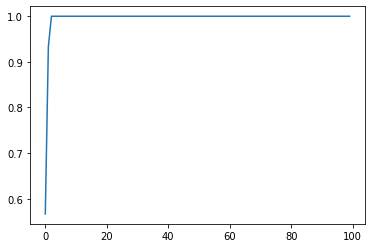

In [ ]:
plt.plot(history.history['accuracy'])

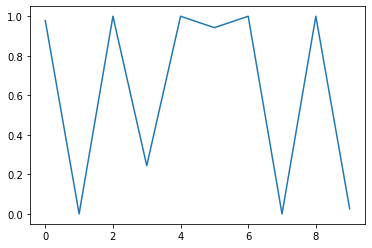

In [ ]:
test_result = transfer_learner.predict(test_images)
plt.plot(test_result)

<Figure size 432x288 with 0 Axes>

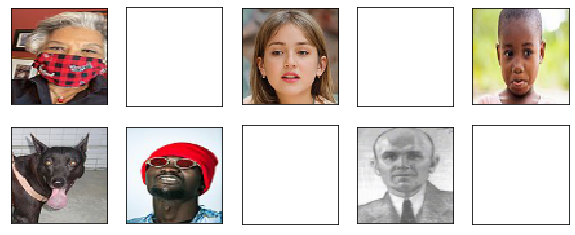

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:            
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

In [ ]:
from tensorflow.python.keras.applications.vgg16 import VGG16

vgg16 = VGG16(weights='imagenet', include_top=False, 
              input_shape=(75, 75, 3))

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0     

In [ ]:
last_layer = vgg16.get_layer('block4_pool')
last_output = last_layer.output

for layer in vgg16.layers:
   layer.trainable = False

my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(32, activation='relu')(my_layer)
my_layer = layers.Dense(32, activation='relu')(my_layer)
my_layer = layers.Dense(1, activation='sigmoid')(my_layer)

transfer_learner = Model(vgg16.input, my_layer)

transfer_learner.compile(optimizer='adam',
                         loss='mse',
                         metrics=['accuracy'])

In [ ]:
transfer_learner.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0  

Epoch 1/100
1/1 [==============================] - 1s 556ms/step - loss: 0.3699 - accuracy: 0.4333
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0408 - accuracy: 0.9667
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0440 - accuracy: 0.9333
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 1.5588e-05 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 1.0948e-05 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 1.2891e-05 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 1.1276e-05 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 9.4365e-06 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 8.7541e-06 - accuracy: 1

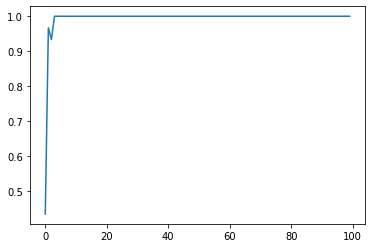

In [ ]:
history = transfer_learner.fit(X, y, epochs=100, shuffle=True)
plt.plot(history.history['accuracy'])

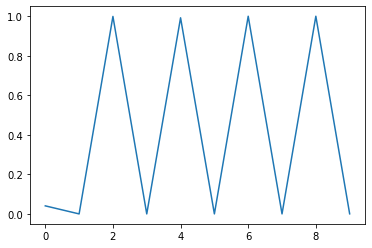

In [ ]:
test_result = transfer_learner.predict(test_images)
plt.plot(test_result)

<Figure size 432x288 with 0 Axes>

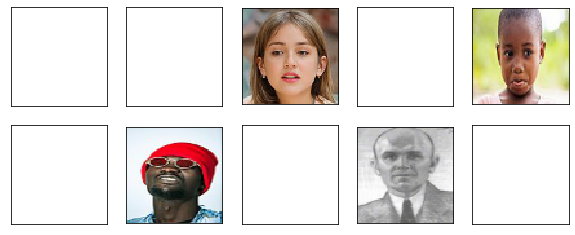

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:            
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')